# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.
c:\python36\lib\site-packages\matplotlib\__init__.py:1003: UserWarning: Duplicate key in file "c:\python36\lib\site-packages\matplotlib\mpl-data\matplotlibrc", line #196
  (fname, cnt))


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#建立模型

In [7]:
#宣告採用序列模型
model = Sequential()

In [8]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

W0330 17:57:58.169663 32856 deprecation.py:506] From C:\pjwu\homework\tensorflow_core\python\ops\resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
#建構隱藏層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [10]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

# 訓練模型

In [11]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [12]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

W0330 17:58:05.414593 32856 module_wrapper.py:139] From C:\pjwu\homework\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 74us/step - loss: 0.2391 - accuracy: 0.9288 - val_loss: 0.1104 - val_accuracy: 0.9654
Epoch 2/10
48000/48000 [==============================] - 3s 70us/step - loss: 0.0929 - accuracy: 0.9720 - val_loss: 0.1028 - val_accuracy: 0.9680
Epoch 3/10
48000/48000 [==============================] - 3s 70us/step - loss: 0.0631 - accuracy: 0.9792 - val_loss: 0.0913 - val_accuracy: 0.9730
Epoch 4/10
48000/48000 [==============================] - 4s 74us/step - loss: 0.0473 - accuracy: 0.9850 - val_loss: 0.0917 - val_accuracy: 0.9744
Epoch 5/10
48000/48000 [==============================] - 4s 73us/step - loss: 0.0360 - accuracy: 0.9882 - val_loss: 0.0936 - val_accuracy: 0.9760
Epoch 6/10
48000/48000 [==============================] - 3s 72us/step - loss: 0.0276 - accuracy: 0.9902 - val_loss: 0.0941 - val_accuracy: 0.9772
Epoch 7/10
48000/48000 [==============================] - 3s 72us/st

# 以圖形顯示訓練過程

In [13]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

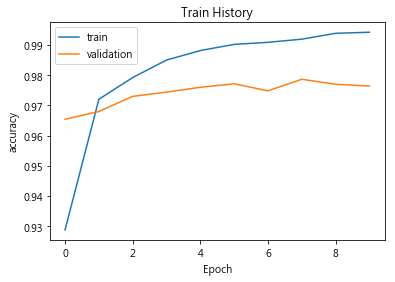

In [17]:
show_train_history(train_history,'accuracy','val_accuracy')

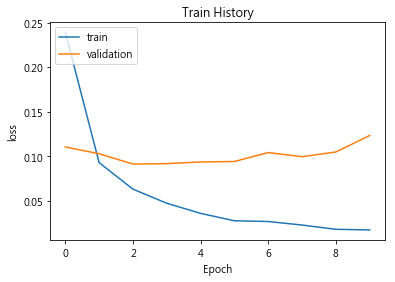

In [18]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [19]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 18us/step

accuracy= 0.9775000214576721
